<a href="https://colab.research.google.com/github/Thiago89ml/Aprendizaje-no-Supervisado-en-un-centro-comercial./blob/main/Grupos_aprendizaje_no_supervizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
X = df

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df['Genre'] = df['Genre'].map({'Male': 0,'Female':1})

In [8]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [9]:
modelo = KMeans(n_clusters=3)
modelo.fit(X_std)

KMeans(n_clusters=3)

In [10]:
df['clusters'] = modelo.labels_
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,1
3,4,1,23,16,77,1
4,5,1,31,17,40,1
5,6,1,22,17,76,1
6,7,1,35,18,6,1
7,8,1,23,18,94,1
8,9,0,64,19,3,0
9,10,1,30,19,72,1


In [11]:
df[df['Age'] == 20]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
2,3,1,20,16,6,1
17,18,0,20,21,66,1
39,40,1,20,37,75,1
99,100,0,20,61,49,1
134,135,0,20,73,5,2


In [12]:
df[df['Age'] == '3'][['Age', 'clusters']]

,Age,clusters


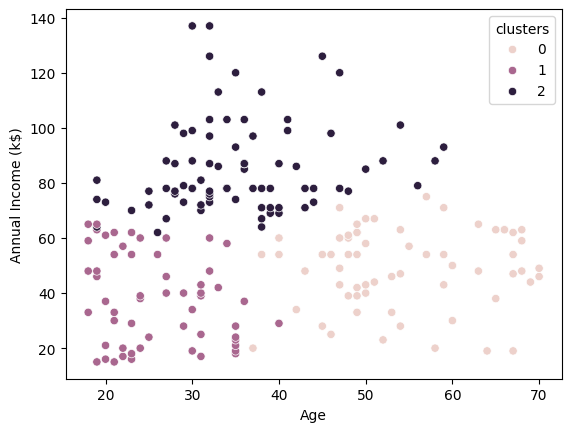

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x = 'Age', y = 'Annual Income (k$)', hue='clusters')
plt.show()

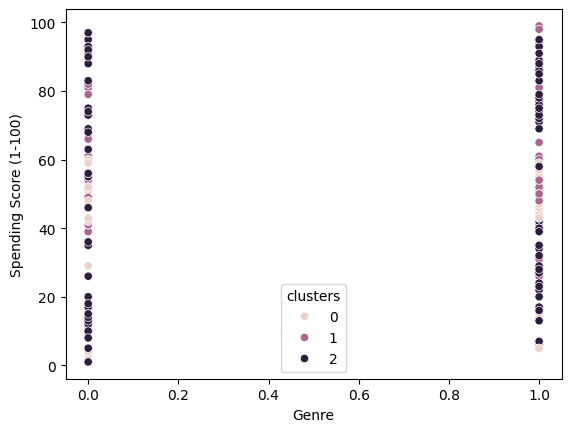

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x = 'Genre', y = 'Spending Score (1-100)', hue='clusters')
plt.show()

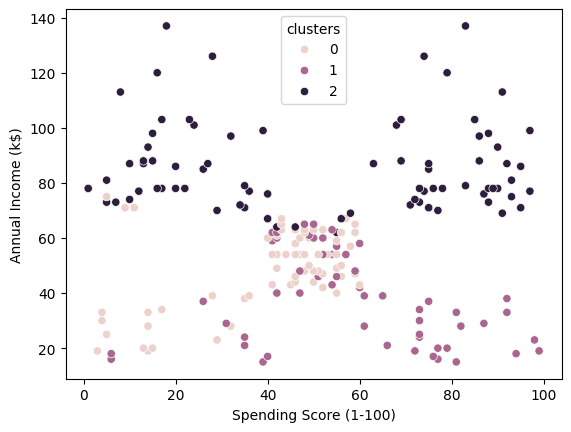

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue='clusters')
plt.show()